In [1]:
from skimage.io import imread
import numpy as np
from clij2fft.richardson_lucy import richardson_lucy_nc, richardson_lucy

In [2]:
from pathlib import Path

# Directory to search
directory = Path(r"/home/bnorthan/images/tnia-python-images/tg/_small_data_/[AS-00304]/TF Confocal_Zstack/_ovs_3x3_fovs")

# Search for specific image extensions
image_files = list(directory.glob('*AF594*.tif'))

print(len(image_files))


21


In [3]:
test= str(image_files[0])

for temp in image_files:
    test = str(temp)
    print(test)
    test2=test.split('Zid')[1][1:4]
    print(test2)

/home/bnorthan/images/tnia-python-images/tg/_small_data_/[AS-00304]/TF Confocal_Zstack/_ovs_3x3_fovs/Gripper 1 - Region 004 - ROI 03 - AF594_Zid_006_Z_-004.tif
006
/home/bnorthan/images/tnia-python-images/tg/_small_data_/[AS-00304]/TF Confocal_Zstack/_ovs_3x3_fovs/Gripper 1 - Region 004 - ROI 03 - AF594_Zid_017_Z_+007.tif
017
/home/bnorthan/images/tnia-python-images/tg/_small_data_/[AS-00304]/TF Confocal_Zstack/_ovs_3x3_fovs/Gripper 1 - Region 004 - ROI 03 - AF594_Zid_001_Z_-009.tif
001
/home/bnorthan/images/tnia-python-images/tg/_small_data_/[AS-00304]/TF Confocal_Zstack/_ovs_3x3_fovs/Gripper 1 - Region 004 - ROI 03 - AF594_Zid_007_Z_-003.tif
007
/home/bnorthan/images/tnia-python-images/tg/_small_data_/[AS-00304]/TF Confocal_Zstack/_ovs_3x3_fovs/Gripper 1 - Region 004 - ROI 03 - AF594_Zid_013_Z_+003.tif
013
/home/bnorthan/images/tnia-python-images/tg/_small_data_/[AS-00304]/TF Confocal_Zstack/_ovs_3x3_fovs/Gripper 1 - Region 004 - ROI 03 - AF594_Zid_016_Z_+006.tif
016
/home/bnorthan/i

In [4]:
# Sort based on the numeric part of the indicator
sorted_files = sorted(
    image_files,
    key=lambda x: int(str(x).split('Zid')[1][1:4])
)

images = []

for image_file in sorted_files:
    print(image_file)
    image = imread(image_file)
    images.append(image)    

images = np.array(images)
print(images.shape)

/home/bnorthan/images/tnia-python-images/tg/_small_data_/[AS-00304]/TF Confocal_Zstack/_ovs_3x3_fovs/Gripper 1 - Region 004 - ROI 03 - AF594_Zid_000_Z_-010.tif
/home/bnorthan/images/tnia-python-images/tg/_small_data_/[AS-00304]/TF Confocal_Zstack/_ovs_3x3_fovs/Gripper 1 - Region 004 - ROI 03 - AF594_Zid_001_Z_-009.tif
/home/bnorthan/images/tnia-python-images/tg/_small_data_/[AS-00304]/TF Confocal_Zstack/_ovs_3x3_fovs/Gripper 1 - Region 004 - ROI 03 - AF594_Zid_002_Z_-008.tif
/home/bnorthan/images/tnia-python-images/tg/_small_data_/[AS-00304]/TF Confocal_Zstack/_ovs_3x3_fovs/Gripper 1 - Region 004 - ROI 03 - AF594_Zid_003_Z_-007.tif
/home/bnorthan/images/tnia-python-images/tg/_small_data_/[AS-00304]/TF Confocal_Zstack/_ovs_3x3_fovs/Gripper 1 - Region 004 - ROI 03 - AF594_Zid_004_Z_-006.tif
/home/bnorthan/images/tnia-python-images/tg/_small_data_/[AS-00304]/TF Confocal_Zstack/_ovs_3x3_fovs/Gripper 1 - Region 004 - ROI 03 - AF594_Zid_005_Z_-005.tif
/home/bnorthan/images/tnia-python-images

In [5]:
import napari 
viewer = napari.Viewer()
viewer.add_image(images[:,1000:1500, 1000:1500], scale=[5,1,1])

<Image layer 'Image' at 0x790ccddf3f10>

In [6]:
print(images.shape)

(21, 3966, 4881)


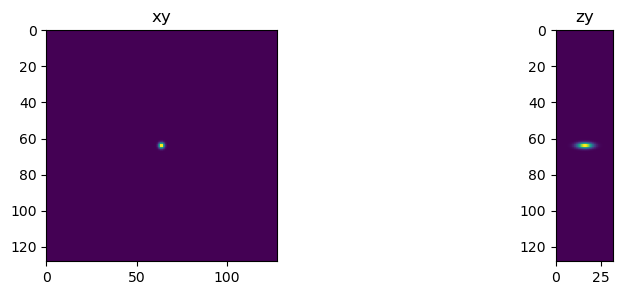

In [7]:
from tnia.deconvolution.gaussian_psf import gaussian_3d
from tnia.plotting.projections import show_xy_zy_max
psf = gaussian_3d(128, 32, 1, 3)
fig = show_xy_zy_max(psf)

In [8]:
from clij2fft.richardson_lucy import richardson_lucy_nc, richardson_lucy
from clij2fft.richardson_lucy_dask import richardson_lucy_dask

test = images[:,1000:1500, 1000:1500]

deconvolved = richardson_lucy_dask(images, psf, 100, 0.0001)

Traceback (most recent call last):
  File "/home/bnorthan/code/imagej/clij2-fft/python/clij2fft/richardson_lucy_dask.py", line 180, in rl_dask_task
    result=richardson_lucy_nc(img, psf, numiterations, regularizationfactor=regularizationfactor, lib=lib, platform = platform, device = device_num)
  File "/home/bnorthan/code/imagej/clij2-fft/python/clij2fft/richardson_lucy.py", line 100, in richardson_lucy_nc
    extended_size = get_next_smooth(extended_size)
  File "/home/bnorthan/code/imagej/clij2-fft/python/clij2fft/pad.py", line 62, in get_next_smooth
    return tuple(map(lambda i: next_smooth(i), size))
  File "/home/bnorthan/code/imagej/clij2-fft/python/clij2fft/pad.py", line 62, in <lambda>
    return tuple(map(lambda i: next_smooth(i), size))
  File "/home/bnorthan/code/imagej/clij2-fft/python/clij2fft/pad.py", line 36, in next_smooth
    z = int(10*math.log2(x))
ValueError: math domain error
Traceback (most recent call last):
  File "/home/bnorthan/code/imagej/clij2-fft/python/c

calling convcorr 0 0


2 warnings generated.
2 warnings generated.
2 warnings generated.



platform 0 NVIDIA CUDA
device name 0 NVIDIA GeForce RTX 4070 Laptop GPU

Richardson Lucy Started
0 10 20 30 40 50 60 70 80 90 
Richardson Lucy Finished

calling convcorr 0 0


2 warnings generated.
2 warnings generated.
2 warnings generated.



platform 0 NVIDIA CUDA
device name 0 NVIDIA GeForce RTX 4070 Laptop GPU

Richardson Lucy Started
0 10 20 30 40 50 60 70 80 90 
Richardson Lucy Finished

calling convcorr 0 0

platform 0 NVIDIA CUDA
device name 0 NVIDIA GeForce RTX 4070 Laptop GPU

Richardson Lucy Started
0 10 20 30 40 50 60 70 80 90 
Richardson Lucy Finished

calling convcorr 0 0

platform 0 NVIDIA CUDA
device name 0 NVIDIA GeForce RTX 4070 Laptop GPU

Richardson Lucy Started
0 10 20 30 40 50 60 70 80 90 
Richardson Lucy Finished

calling convcorr 0 0

platform 0 NVIDIA CUDA
device name 0 NVIDIA GeForce RTX 4070 Laptop GPU

Richardson Lucy Started
0 10 20 30 40 50 60 70 80 90 
Richardson Lucy Finished

calling convcorr 0 0

platform 0 NVIDIA CUDA
device name 0 NVIDIA GeForce RTX 4070 Laptop GPU

Richardson Lucy Started
0 10 20 30 40 50 60 70 80 90 
Richardson Lucy Finished

calling convcorr 0 0

platform 0 NVIDIA CUDA
device name 0 NVIDIA GeForce RTX 4070 Laptop GPU

Richardson Lucy Started
0 10 20 30 40 50 60 70 80 9

In [13]:
viewer = napari.Viewer()

viewer.add_image(images, scale=[5,1,1])
viewer.add_image(deconvolved, scale=[5,1,1])

<Image layer 'deconvolved' at 0x790c9d0449d0>

/home/bnorthan/mambaforge/envs/decon-dl-env2/lib/python3.9/site-packages/napari/_vispy/layers/image.py:251: UserWarning: data shape (21, 3966, 4881) exceeds GL_MAX_TEXTURE_SIZE 2048 in at least one axis and will be downsampled. Rendering is currently in 3D mode.
  warnings.warn(
/home/bnorthan/mambaforge/envs/decon-dl-env2/lib/python3.9/site-packages/napari/_vispy/layers/image.py:251: UserWarning: data shape (21, 3966, 4881) exceeds GL_MAX_TEXTURE_SIZE 2048 in at least one axis and will be downsampled. Rendering is currently in 3D mode.
  warnings.warn(
/home/bnorthan/mambaforge/envs/decon-dl-env2/lib/python3.9/site-packages/napari/_vispy/layers/image.py:251: UserWarning: data shape (21, 3966, 4881) exceeds GL_MAX_TEXTURE_SIZE 2048 in at least one axis and will be downsampled. Rendering is currently in 3D mode.
  warnings.warn(
/home/bnorthan/mambaforge/envs/decon-dl-env2/lib/python3.9/site-packages/napari/_vispy/layers/image.py:251: UserWarning: data shape (21, 3966, 4881) exceeds GL_

In [12]:
deconvolved = deconvolved.astype('uint16')
images = images.astype('uint16')